In [1]:
import mal

df = mal.get_database()

df.head(5)

,title,type,status,started,finished,duration,episodes,fav,score,rank,scored,pop,value
mal_id,,,,,,,,,,,,,
1,Cowboy Bebop,TV,CP,1998-04-03,1999-04-24,24 min per ep,26,59968,8.77,32,661519,67,99
5,Cowboy Bebop: Tengoku no Tobira,Movie,CP,2001-09-01,NaT,1 hr 55 min,1,1063,8.39,163,168515,450,613
6,Trigun,TV,CP,1998-04-01,1998-09-30,24 min per ep,26,11882,8.23,285,288760,240,525
7,Witch Hunter Robin,TV,CP,2002-07-02,2002-12-24,25 min per ep,26,512,7.27,2508,37135,1671,4179
8,Bouken Ou Beet,TV,CP,2004-09-30,2005-09-29,23 min per ep,52,10,6.97,3769,5463,4320,8089


In [5]:
df.skew()

C:\Users\ANDREU~1\AppData\Local\Temp/ipykernel_8848/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


episodes    29.677850
fav         23.419083
score       -0.197450
rank         0.005090
scored       8.574247
pop          0.000000
value       -0.003560
dtype: float64

count    12866.000000
mean         6.483733
std          0.892935
min          1.850000
25%          5.880000
50%          6.490000
75%          7.120000
max          9.170000
Name: score, dtype: float64

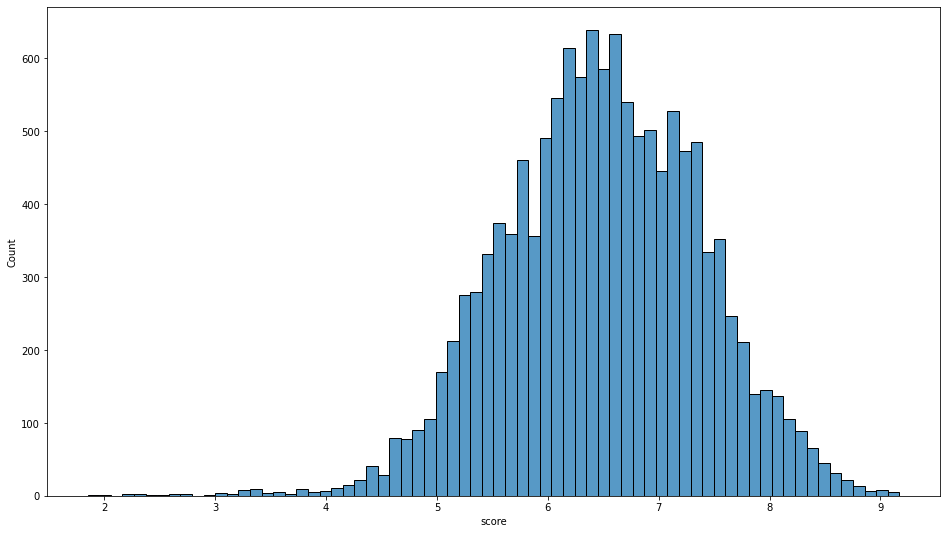

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,9))
sns.histplot(df, x='score')

df.score.describe()

0.5052085339872677

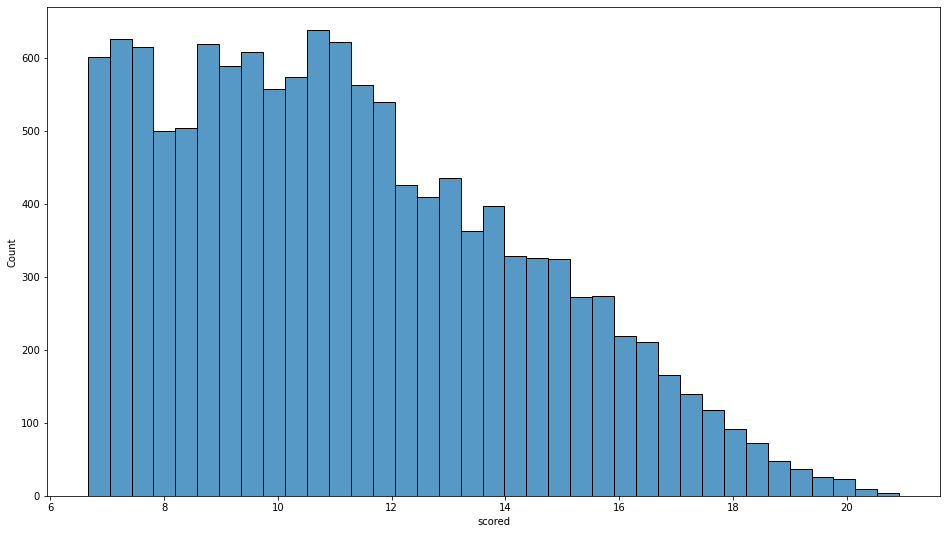

In [58]:
import numpy as np

logat = np.log(df.scored)

plt.figure(figsize=(16,9))
sns.histplot(logat)

logat.skew()

3.4130711773997384

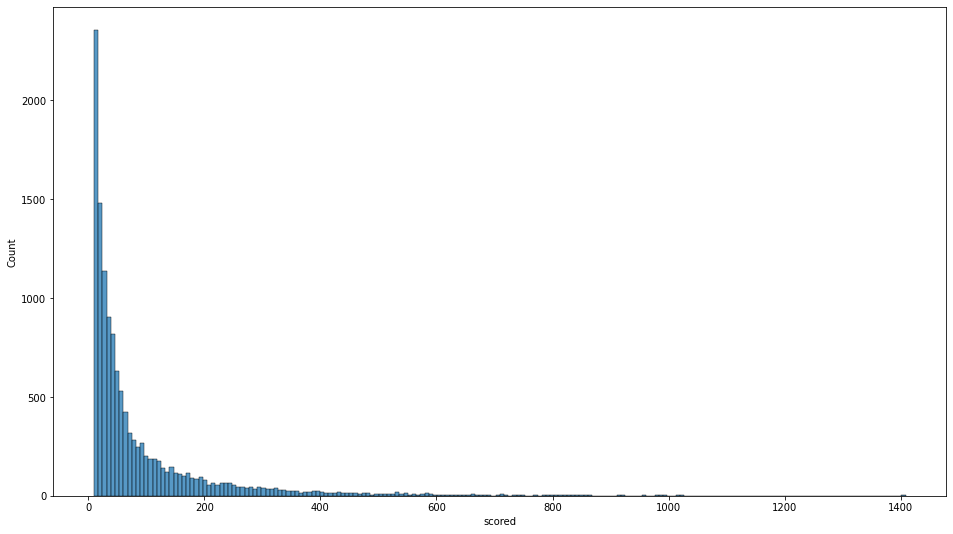

In [40]:
rooted = np.sqrt(df.scored)

plt.figure(figsize=(16,9))
sns.histplot(rooted)

rooted.skew()

0.08116306892104014

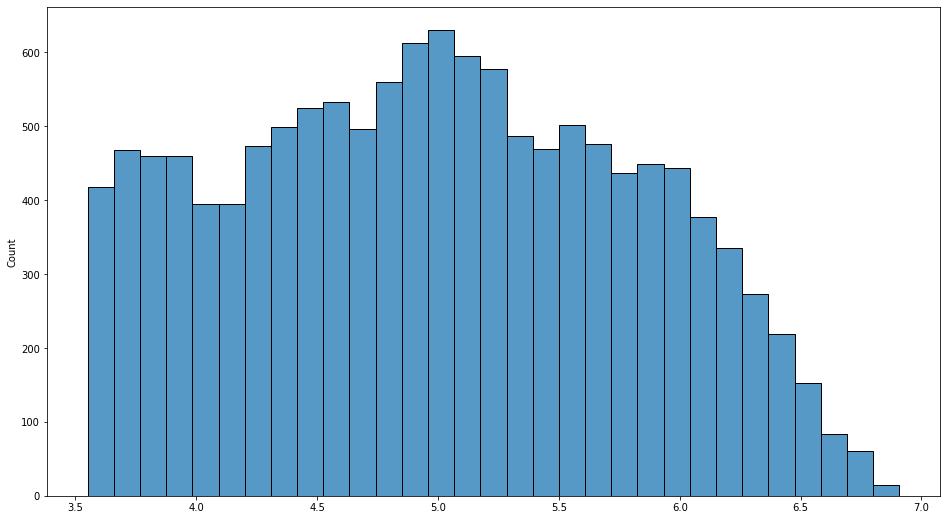

In [81]:
from scipy import stats

bo = stats.boxcox(df.scored.dropna().astype('float'))[0]

plt.figure(figsize=(16,9))
sns.histplot(bo)

stats.skew(bo)

In [72]:
bo

(array([6.85711057, 6.80275214, 6.83764148, ..., 4.56359763, 4.44884973,
        4.76854793]),
 -0.11896331962371995)

In [27]:
import pandas as pd

def linear01(series : pd.Series):
    return (series - series.min()) / (series.max() - series.min())

def linear_comb(*lst):
    return sum(linear01(a) for a in lst) / len(lst)

In [88]:
df['value2'] = linear_comb(df.score, df.scored)
df.sort_values('value2', ascending=False, inplace=True)

mal.print_format(df, 5)

mal_id,title,type,status,started,finished,duration,episodes,fav,score,rank,scored,pop,value,value2
1535,Death Note,TV,CP,2006-10-04 00:00:00,2007-06-27 00:00:00,23 min per ep,37,131k,8.63,59,1.98M,2,61,0.961784
16498,Shingeki no Kyojin,TV,CP,2013-04-07 00:00:00,2013-09-29 00:00:00,24 min per ep,25,126k,8.51,97,1.98M,1,98,0.954918
5114,Fullmetal Alchemist: Brotherhood,TV,CP,2009-04-05 00:00:00,2010-07-04 00:00:00,24 min per ep,64,176k,9.17,1,1.5M,5,6,0.877105
30276,One Punch Man,TV,CP,2015-10-05 00:00:00,2015-12-21 00:00:00,24 min per ep,12,50.4k,8.54,88,1.62M,4,92,0.864455
32281,Kimi no Na wa.,Movie,CP,2016-08-26 00:00:00,NaT,1 hr 46 min,1,69.9k,8.92,17,1.35M,9,26,0.822436


In [87]:
df['value2'] = linear_comb(df.score, np.sqrt(df.scored))
df.sort_values('value2', ascending=False, inplace=True)

mal.print_format(df, 5)

mal_id,title,type,status,started,finished,duration,episodes,fav,score,rank,scored,pop,value,value2
1535,Death Note,TV,CP,2006-10-04 00:00:00,2007-06-27 00:00:00,23 min per ep,37,131k,8.63,59,1.98M,2,61,0.962444
16498,Shingeki no Kyojin,TV,CP,2013-04-07 00:00:00,2013-09-29 00:00:00,24 min per ep,25,126k,8.51,97,1.98M,1,98,0.954918
5114,Fullmetal Alchemist: Brotherhood,TV,CP,2009-04-05 00:00:00,2010-07-04 00:00:00,24 min per ep,64,176k,9.17,1,1.5M,5,6,0.933757
30276,One Punch Man,TV,CP,2015-10-05 00:00:00,2015-12-21 00:00:00,24 min per ep,12,50.4k,8.54,88,1.62M,4,92,0.908000
32281,Kimi no Na wa.,Movie,CP,2016-08-26 00:00:00,NaT,1 hr 46 min,1,69.9k,8.92,17,1.35M,9,26,0.894311


In [89]:
df['value2'] = linear_comb(df.score.rank(), df.scored.rank())
df.sort_values('value2', ascending=False, inplace=True)

mal.print_format(df, 5)

mal_id,title,type,status,started,finished,duration,episodes,fav,score,rank,scored,pop,value,value2
5114,Fullmetal Alchemist: Brotherhood,TV,CP,2009-04-05 00:00:00,2010-07-04 00:00:00,24 min per ep,64,176k,9.17,1,1.5M,5,6,0.999845
11061,Hunter x Hunter (2011),TV,CP,2011-10-02 00:00:00,2014-09-24 00:00:00,23 min per ep,148,149k,9.07,5,1.12M,14,19,0.999339
9253,Steins;Gate,TV,CP,2011-04-06 00:00:00,2011-09-14 00:00:00,24 min per ep,24,150k,9.1,3,1.04M,20,23,0.999184
32281,Kimi no Na wa.,Movie,CP,2016-08-26 00:00:00,NaT,1 hr 46 min,1,69.9k,8.92,17,1.35M,9,26,0.999048
28851,Koe no Katachi,Movie,CP,2016-09-17 00:00:00,NaT,2 hr 10 min,1,60.4k,8.98,13,1.08M,15,28,0.999009


In [90]:
df['value2'] = linear_comb(df.score, df.scored.rank())
df.sort_values('value2', ascending=False, inplace=True)

mal.print_format(df, 5)

mal_id,title,type,status,started,finished,duration,episodes,fav,score,rank,scored,pop,value,value2
5114,Fullmetal Alchemist: Brotherhood,TV,CP,2009-04-05 00:00:00,2010-07-04 00:00:00,24 min per ep,64,176k,9.17,1,1.5M,5,6,0.999845
38524,Shingeki no Kyojin Season 3 Part 2,TV,CP,2019-04-29 00:00:00,2019-07-01 00:00:00,23 min per ep,10,39.5k,9.11,2,934k,32,34,0.994697
9253,Steins;Gate,TV,CP,2011-04-06 00:00:00,2011-09-14 00:00:00,24 min per ep,24,150k,9.1,3,1.04M,20,23,0.994480
11061,Hunter x Hunter (2011),TV,CP,2011-10-02 00:00:00,2014-09-24 00:00:00,23 min per ep,148,149k,9.07,5,1.12M,14,19,0.992664
28851,Koe no Katachi,Movie,CP,2016-09-17 00:00:00,NaT,2 hr 10 min,1,60.4k,8.98,13,1.08M,15,28,0.986478


In [86]:
df['value2'] = linear_comb(df.score, np.log(df.scored))
df.sort_values('value2', ascending=False, inplace=True)

mal.print_format(df, 5)

mal_id,title,type,status,started,finished,duration,episodes,fav,score,rank,scored,pop,value,value2
5114,Fullmetal Alchemist: Brotherhood,TV,CP,2009-04-05 00:00:00,2010-07-04 00:00:00,24 min per ep,64,176k,9.17,1,1.5M,5,6,0.985733
11061,Hunter x Hunter (2011),TV,CP,2011-10-02 00:00:00,2014-09-24 00:00:00,23 min per ep,148,149k,9.07,5,1.12M,14,19,0.964236
32281,Kimi no Na wa.,Movie,CP,2016-08-26 00:00:00,NaT,1 hr 46 min,1,69.9k,8.92,17,1.35M,9,26,0.963345
1535,Death Note,TV,CP,2006-10-04 00:00:00,2007-06-27 00:00:00,23 min per ep,37,131k,8.63,59,1.98M,2,61,0.962980
9253,Steins;Gate,TV,CP,2011-04-06 00:00:00,2011-09-14 00:00:00,24 min per ep,24,150k,9.1,3,1.04M,20,23,0.962390


In [83]:
df['value2'] = linear_comb(df.score[~df.scored.isna()], bo)
df.sort_values('value2', ascending=False, inplace=True)

mal.print_format(df, 5)

mal_id,title,type,status,started,finished,duration,episodes,fav,score,rank,scored,pop,value,value2
5114,Fullmetal Alchemist: Brotherhood,TV,CP,2009-04-05 00:00:00,2010-07-04 00:00:00,24 min per ep,64,176k,9.17,1,1.5M,5,6,0.992387
11061,Hunter x Hunter (2011),TV,CP,2011-10-02 00:00:00,2014-09-24 00:00:00,23 min per ep,148,149k,9.07,5,1.12M,14,19,0.977460
9253,Steins;Gate,TV,CP,2011-04-06 00:00:00,2011-09-14 00:00:00,24 min per ep,24,150k,9.1,3,1.04M,20,23,0.984706
38524,Shingeki no Kyojin Season 3 Part 2,TV,CP,2019-04-29 00:00:00,2019-07-01 00:00:00,23 min per ep,10,39.5k,9.11,2,934k,32,34,0.995831
32281,Kimi no Na wa.,Movie,CP,2016-08-26 00:00:00,NaT,1 hr 46 min,1,69.9k,8.92,17,1.35M,9,26,0.965016
28851,Koe no Katachi,Movie,CP,2016-09-17 00:00:00,NaT,2 hr 10 min,1,60.4k,8.98,13,1.08M,15,28,0.966124
1535,Death Note,TV,CP,2006-10-04 00:00:00,2007-06-27 00:00:00,23 min per ep,37,131k,8.63,59,1.98M,2,61,0.946331
2904,Code Geass: Hangyaku no Lelouch R2,TV,CP,2008-04-06 00:00:00,2008-09-28 00:00:00,24 min per ep,25,62.9k,8.91,19,917k,34,53,0.982240
199,Sen to Chihiro no Kamikakushi,Movie,CP,2001-07-20 00:00:00,NaT,2 hr 4 min,1,24.0k,8.81,25,957k,31,56,0.969914
40028,Shingeki no Kyojin: The Final Season,TV,CP,2020-12-07 00:00:00,2021-03-29 00:00:00,23 min per ep,16,44.1k,8.99,11,630k,76,87,0.966269
